#### Single Linear Regression

In [33]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target
iris['species'] = iris['species'].map({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})
iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
60,5.0,2.0,3.5,1.0,Iris-versicolor
40,5.0,3.5,1.3,0.3,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
70,5.9,3.2,4.8,1.8,Iris-versicolor
5,5.4,3.9,1.7,0.4,Iris-setosa


In [38]:
def scaler(*args, **kwargs) -> pd.DataFrame:
    df = args[0]
    scaler_name = args[1]
    
    column_list = df.columns
    scaled_map = {}
    
    for col in column_list:
        if not df[col].dtype.kind in 'bifc':
            scaled_map[col] = df[col].values
        else:    
            scaler = getattr(__import__('sklearn.preprocessing', fromlist=[scaler_name]), scaler_name)()
            X = df[col].values.reshape(-1, 1)
            X_scaled = scaler.fit_transform(X)
            scaled_map[col] = X_scaled.flatten()
        
    return pd.DataFrame(scaled_map)

In [40]:
scaled_iris = scaler(iris, "StandardScaler")
scaled_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
43,-1.021849,1.019004,-1.226552,-0.788916,Iris-setosa
26,-1.021849,0.788808,-1.226552,-1.052180,Iris-setosa
18,-0.173674,1.709595,-1.169714,-1.183812,Iris-setosa
110,0.795669,0.328414,0.762758,1.053935,Iris-virginica
98,-0.900681,-1.282963,-0.430828,-0.130755,Iris-versicolor


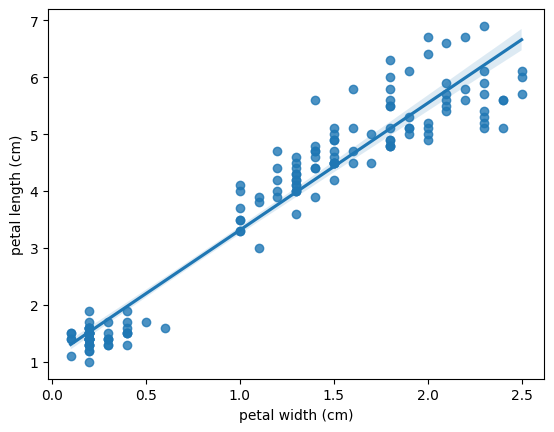

In [43]:
sns.regplot(data=iris, x='petal width (cm)', y='petal length (cm)')
plt.show()

In [44]:
X = scaled_iris[['petal width (cm)']]
y = scaled_iris[['petal length (cm)']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)

In [55]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values,\
    'Prediction': pd.DataFrame(y_pred)[0].values})
df.sample(5)

,Actual,Prediction
11,-1.340227,-1.398406
25,0.819596,1.405268
5,-1.283389,-1.016087
23,1.046945,1.150388
6,-0.089803,0.130871


In [68]:
# The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y, model.predict(X)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' %model.score(X, y))

Mean squared error: 0.07
Variance score: 0.93


In [80]:
print("Test score");print("-"*20)
print("model.score: %.2f" %model.score(X_test, y_test))
print("Mean Square Error: %.2f" %mean_squared_error(y_test, model.predict(X_test)))
print("Mean Absolute Error: %.2f" %mean_absolute_error(y_test, model.predict(X_test)))
print("-"*20)
print("Train score");print("-"*20)
print("Train Score: %.2f" %model.score(X_train, y_train))
print("Mean Square Error: %.2f" %mean_squared_error(y_train, model.predict(X_train)))
print("Mean Absolute Error: %.2f" %mean_absolute_error(y_train, model.predict(X_train)))

Test score
--------------------
model.score: 0.93
Mean Square Error: 0.08
Mean Absolute Error: 0.22
--------------------
Train score
--------------------
Train Score: 0.93
Mean Square Error: 0.07
Mean Absolute Error: 0.21


In [81]:
# The coefficients
m=model.coef_[0] # chi co 1 m
b=model.intercept_
print('Coefficients: \n', m)
print('Interceft: \n', b)

Coefficients: 
 [0.96815022]
Interceft: 
 [0.0025813]


In [84]:
reg_line = model.predict(X)

In [85]:
x_now = [[1.5]]
y_now = model.predict(x_now)
print(y_now)

[[1.45480663]]


c:\Users\DELL\anaconda3\envs\cassandra_app\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


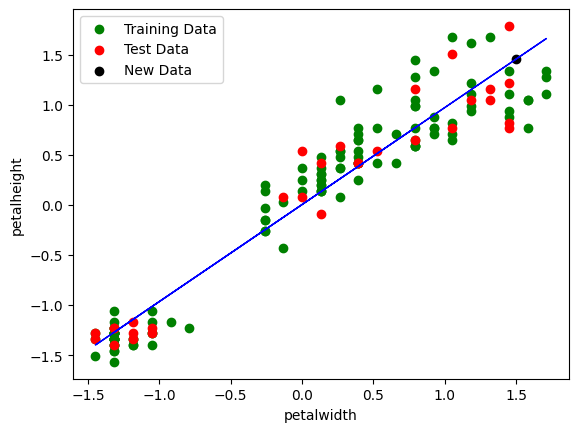

In [86]:
# Plot outputs
plt.scatter(X_train, y_train, color='green', label="Training Data")
plt.scatter(X_test, y_test, color='red', label= "Test Data")
plt.scatter(x_now, y_now, color='black', label= "New Data")
plt.plot(X, reg_line, color="blue", linewidth=1)

plt.xlabel("petalwidth")
plt.ylabel("petalheight")
plt.legend()
plt.show()